In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [3]:
# Data Loading
# Load dataset from the specified path
data = pd.read_csv(r"C:\Users\aldhu\Desktop\Apziva\Project1\term-deposit-marketing-2020.csv")
print("Data Loaded Successfully")

Data Loaded Successfully


In [4]:
# Data Preprocessing
# Summary statistics, unique values, and correlation matrix
summary_statistics = data.describe()
unique_values = data.select_dtypes(include=['object']).nunique()
correlation_matrix = data.corr()

C:\Users\aldhu\AppData\Local\Temp\ipykernel_10716\2030702887.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


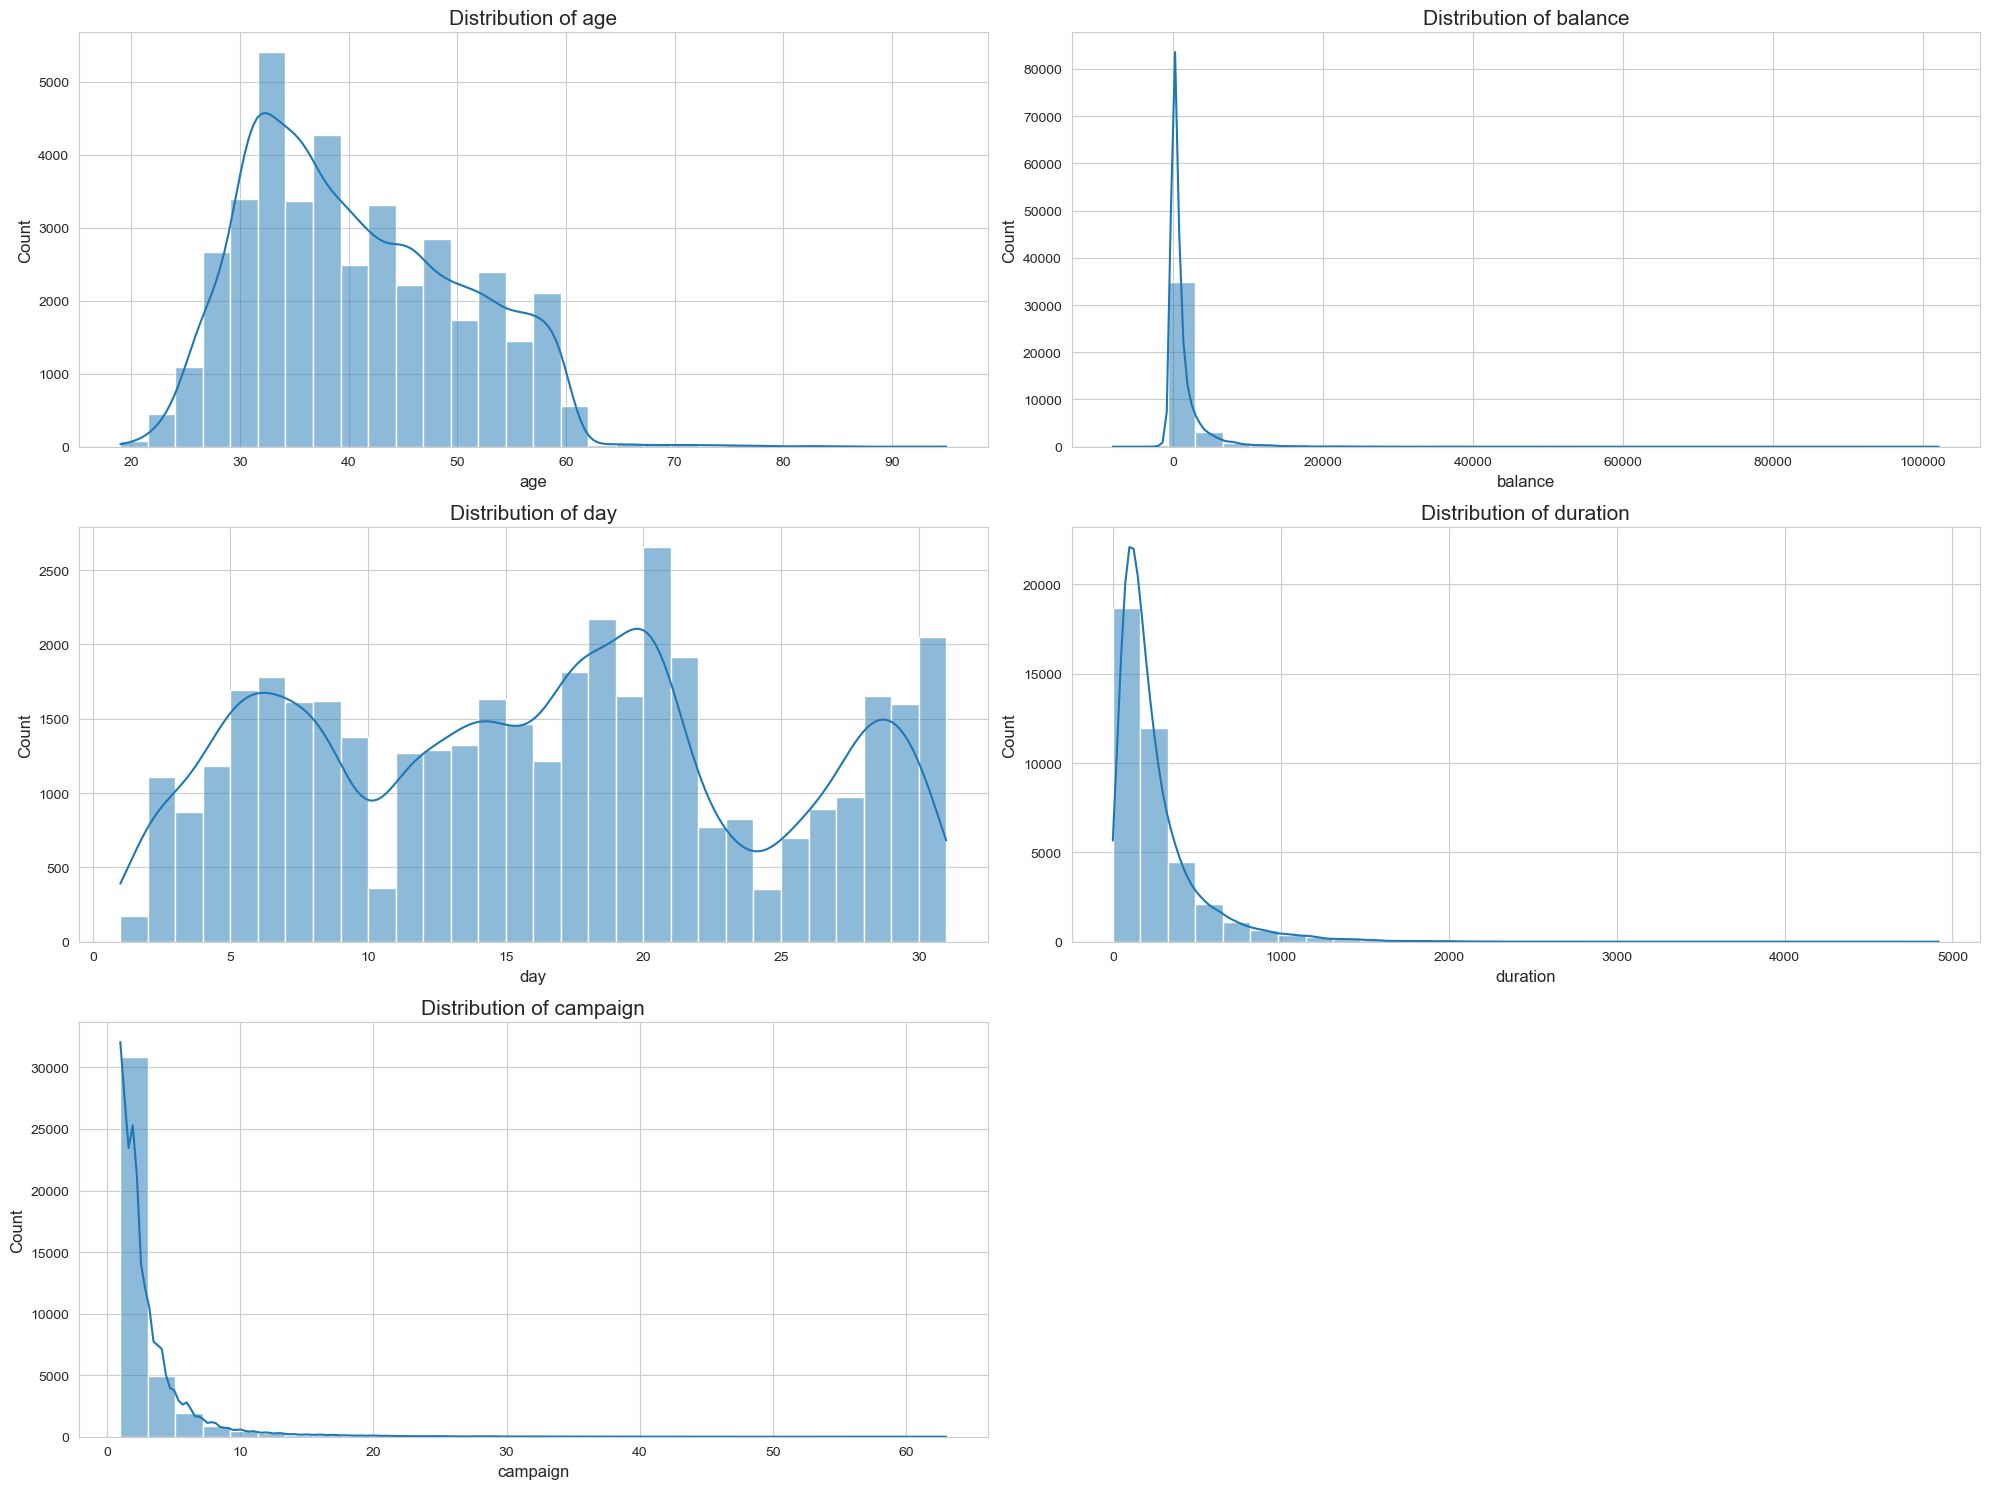

In [5]:
# Data Visualization
# Histograms for numerical columns
sns.set_style("whitegrid")
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign']
plt.figure(figsize=(20, 15))
for index, col in enumerate(numerical_cols):
    plt.subplot(3, 2, index+1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=15)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\aldhu\AppData\Local\Temp\ipykernel_10716\3597458989.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


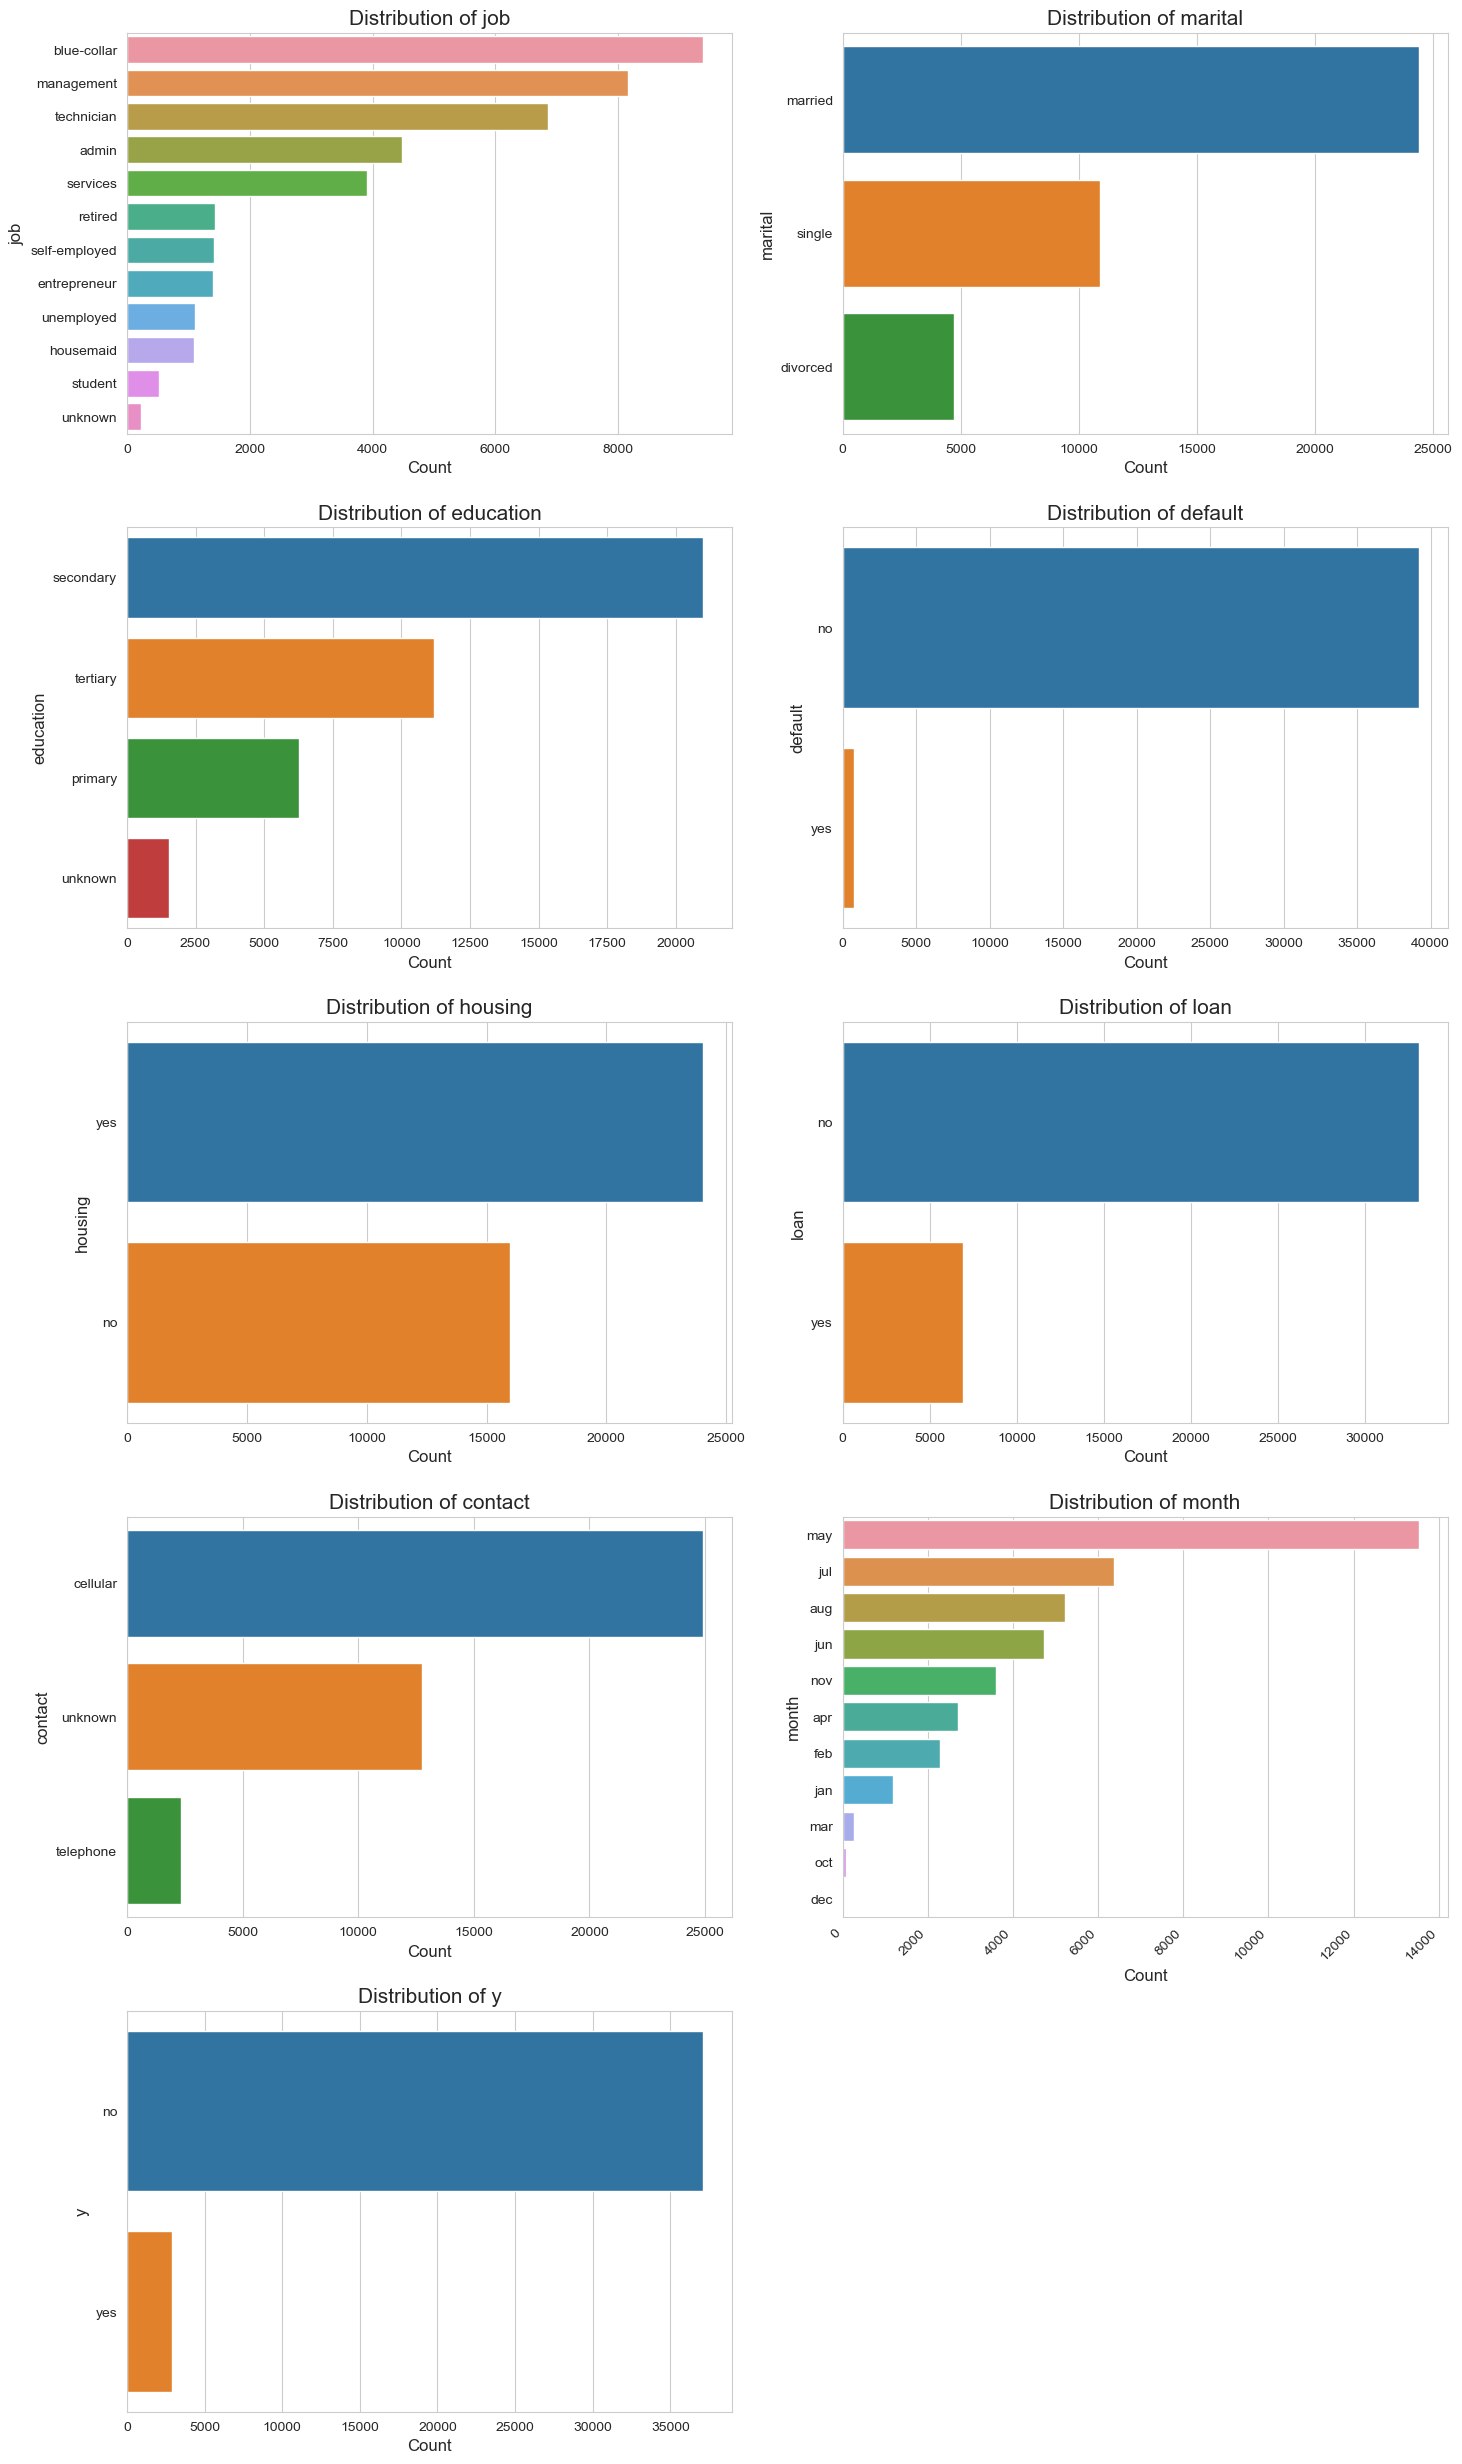

In [6]:
# Bar charts for categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']
num_columns = 2
num_rows = int(len(categorical_cols) / num_columns) + (len(categorical_cols) % num_columns > 0)
plt.figure(figsize=(15, num_rows * 5))
for index, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_columns, index + 1)
    chart = sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}', fontsize=15)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(col, fontsize=12)
    if col == 'month':
        chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout(pad=2)
plt.show()

In [7]:
# Data Quality Checks
# Checking for missing values and duplicate rows
missing_values = data.isnull().sum()
duplicate_rows = data.duplicated().sum()
data_types = data.dtypes

In [8]:
# Encoding Categorical Data
encoded_data = data.copy()
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
label_encoder = LabelEncoder()
onehot_cols = ['job', 'marital', 'education', 'contact', 'month']
label_cols = ['default', 'housing', 'loan', 'y']
for col in onehot_cols:
    encoded_col = onehot_encoder.fit_transform(encoded_data[col].values.reshape(-1, 1))
    encoded_col_df = pd.DataFrame(encoded_col, columns=[f"{col}_{cat}" for cat in onehot_encoder.categories_[0][1:]])
    encoded_data = encoded_data.drop(col, axis=1).join(encoded_col_df)
for col in label_cols:
    encoded_data[col] = label_encoder.fit_transform(encoded_data[col])

C:\Users\aldhu\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aldhu\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aldhu\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\aldhu\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

In [9]:
# Train-Test Split
X = encoded_data.drop('y', axis=1)
y = encoded_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# Model Training and Hyperparameter Tuning
# Random Forest Classifier
rf_params = {
    'n_estimators': [500],
    'max_depth': [8],
    'max_features': [8],
    'min_samples_split': [5]
}
rf = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=2)
rf_cv_model.fit(X_train, y_train)
print("Best Parameters for RandomForestClassifier:", rf_cv_model.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for RandomForestClassifier: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 5, 'n_estimators': 500}


In [13]:
# Decision Tree Classifier
dt_params = {
    'max_depth': [5],
    'min_samples_split': [2],
    'min_samples_leaf': [4],
    'max_features': [None]
}
dt = DecisionTreeClassifier()
dt_cv_model = GridSearchCV(dt, dt_params, cv=5, n_jobs=-1, verbose=2)
dt_cv_model.fit(X_train, y_train)
print("Best Parameters for DecisionTreeClassifier:", dt_cv_model.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\aldhu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aldhu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aldhu\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\aldhu\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\aldhu\anaconda3\Lib\site-packag

Best Parameters for DecisionTreeClassifier: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [15]:
from sklearn.model_selection import RandomizedSearchCV

xgb_params = {
    'n_estimators': [100, 300, 500],  # Reduced number of values
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],  # Reduced number of values
    'min_child_weight': [1, 3],  # Reduced number of values
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_cv_model = RandomizedSearchCV(xgb, xgb_params, cv=3, n_iter=10, n_jobs=-1, verbose=2)
xgb_cv_model.fit(X_train, y_train)
print("Best Parameters for XGBClassifier:", xgb_cv_model.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for XGBClassifier: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [16]:
# Model Comparison
results = []
names = []
models = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier]
def compML(algorithm):
    model = algorithm().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_name = algorithm.__name__
    results.append(accuracy)
    names.append(model_name)
    print(model_name, "-> The accuracy of the model:", accuracy)
for i in models:
    compML(i)

C:\Users\aldhu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression -> The accuracy of the model: 0.93025
DecisionTreeClassifier -> The accuracy of the model: 0.916625
RandomForestClassifier -> The accuracy of the model: 0.934875
GradientBoostingClassifier -> The accuracy of the model: 0.936875


In [17]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

results = []
names = []
models = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier]

def compML(algorithm):
    model = algorithm().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    model_name = algorithm.__name__
    results.append(accuracy)
    names.append(model_name)
    
    print(model_name, "-> Accuracy:", accuracy)
    print(model_name, "-> F1 Score:", f1)
    print(model_name, "-> ROC AUC:", roc_auc)

for i in models:
    compML(i)


C:\Users\aldhu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression -> Accuracy: 0.93025
LogisticRegression -> F1 Score: 0.3178484107579462
LogisticRegression -> ROC AUC: 0.6064990695243173
DecisionTreeClassifier -> Accuracy: 0.914625
DecisionTreeClassifier -> F1 Score: 0.42362869198312236
DecisionTreeClassifier -> ROC AUC: 0.696653182302763
RandomForestClassifier -> Accuracy: 0.935625
RandomForestClassifier -> F1 Score: 0.4018583042973286
RandomForestClassifier -> ROC AUC: 0.6444179407765219
GradientBoostingClassifier -> Accuracy: 0.936875
GradientBoostingClassifier -> F1 Score: 0.4540540540540541
GradientBoostingClassifier -> ROC AUC: 0.6752295817948986


In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Create a list of models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

# Loop through each model
for model in models:
    print(f"Model: {model.__class__.__name__}")
    
    # Oversample the minority class using SMOTE
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Calculate class weights manually
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    minority_class_weight = class_weights[1]  # Weight for the minority class

    # Define the model with class weight
    if model.__class__.__name__ == 'LogisticRegression':
        model = LogisticRegression(class_weight={0: 1, 1: minority_class_weight})
    elif model.__class__.__name__ == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier(class_weight={0: 1, 1: minority_class_weight})
    elif model.__class__.__name__ == 'RandomForestClassifier':
        model = RandomForestClassifier(class_weight={0: 1, 1: minority_class_weight})
    elif model.__class__.__name__ == 'GradientBoostingClassifier':
        model = GradientBoostingClassifier()

    # Fit the model on the resampled and weighted dataset
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate and print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("ROC AUC:", roc_auc)
    print("=" * 50)

Model: LogisticRegression


C:\Users\aldhu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.68225
F1 Score: 0.2989520132377275
ROC AUC: 0.8086416193954649
Model: DecisionTreeClassifier
Accuracy: 0.91525
F1 Score: 0.4104347826086957
ROC AUC: 0.684771020884748
Model: RandomForestClassifier
Accuracy: 0.93325
F1 Score: 0.3790697674418605
ROC AUC: 0.6349941903105722
Model: GradientBoostingClassifier
Accuracy: 0.9275
F1 Score: 0.49477351916376305
ROC AUC: 0.7304624427365357


In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Create a list of models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

# Loop through each model
for model in models:
    print(f"Model: {model.__class__.__name__}")
    
    # Oversample the minority class using SMOTE
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    # Increase class weight for the minority class
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    minority_class_weight = class_weights[1] * 9  # Increase the weight
    
    # Define the model with class weight
    if model.__class__.__name__ == 'LogisticRegression':
        model = LogisticRegression(class_weight={0: 1, 1: minority_class_weight})
    elif model.__class__.__name__ == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier(class_weight={0: 1, 1: minority_class_weight})
    elif model.__class__.__name__ == 'RandomForestClassifier':
        model = RandomForestClassifier(class_weight={0: 1, 1: minority_class_weight})
    elif model.__class__.__name__ == 'GradientBoostingClassifier':
        model = GradientBoostingClassifier()

    # Fit the model on the resampled and weighted dataset
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate and print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("ROC AUC:", roc_auc)
    print("=" * 50)


Model: LogisticRegression


C:\Users\aldhu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.328625
F1 Score: 0.17381941239809262
ROC AUC: 0.6370766383098776
Model: DecisionTreeClassifier
Accuracy: 0.91475
F1 Score: 0.3964601769911504
ROC AUC: 0.6747271510265366
Model: RandomForestClassifier
Accuracy: 0.93125
F1 Score: 0.3125
ROC AUC: 0.6029643771246533
Model: GradientBoostingClassifier
Accuracy: 0.9275
F1 Score: 0.49477351916376305
ROC AUC: 0.7304624427365357
